In [431]:
from joblib import dump, load
import pandas as pd
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import numpy as np
import matplotlib as mpl

In [432]:
df = pd.read_parquet('./data/data_df_hcm_v1.parquet')
target_df = pd.read_parquet('./data/target_df_hcm_v1.parquet')

load_model = load("./model/hcm/cat/v1/model.joblib")
FS = json.load(open('./data/hcm_v1.json', 'r'))
cat_cols = FS['cat_cols']
num_cols = FS['num_cols']
all_cols = cat_cols + num_cols

df = df[all_cols]

In [433]:
full_df = pd.concat([df, target_df['target']], axis = 1)

In [434]:
df.index.tolist() == target_df.index.tolist()

True

In [435]:
full_df['target']

24794    450.000000
37176    176.000000
6905     406.250000
6412      69.863014
24436    185.000000
            ...    
2697      96.250000
22001    123.595506
21481     51.875000
10914    257.352941
7477     100.000000
Name: target, Length: 44209, dtype: float64

In [436]:
train_df = full_df.iloc[:35000]
test_df = full_df.iloc[35000:]

print(train_df.shape, test_df.shape)

(35000, 17) (9209, 17)


In [437]:
def train_test_split_by_col(train_df, test_df, X_cols, y_col):
    X_train, X_test, y_train, y_test = train_df[X_cols], test_df[X_cols], train_df[y_col], test_df[y_col]

    return X_train, X_test, y_train, y_test


In [438]:
target_feature = 'target'

In [439]:
X_train, X_test, y_train, y_test = train_test_split_by_col(train_df = train_df, test_df = test_df, X_cols = all_cols, y_col = target_feature)

In [440]:
len(y_test)

9209

In [441]:
X_test

,typeOfRealEstate,houseDirection,street,district,certificateOfLandUseRight,accessibility,ward,landSize,facade,w,h,numberOfBedRooms,lon,frontWidth,lat,numberOfBathRooms
28631,3,0,802,10,0,0,83,102.0,2,0.00,19.136697,7.000000,106.657538,0.00,10.800997,7.000000
24950,0,0,724,40,1,0,370,83.0,0,0.00,19.136697,2.000000,106.666472,0.00,10.734934,2.000000
32494,1,0,11,10,0,1,11,133.0,0,0.00,19.136697,4.696326,106.649001,0.00,10.800249,4.478184
20889,3,0,219,18,1,1,172,80.0,2,4.00,20.000000,4.696326,106.751291,4.00,10.807516,4.478184
19437,1,1,321,13,1,4,227,44.0,2,4.00,11.000000,1.000000,106.667527,4.00,10.871755,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,1,0,153,1,1,3,123,40.0,0,4.00,10.000000,2.000000,106.732035,4.00,10.730745,2.000000
22001,3,0,30,20,1,0,30,178.0,2,0.00,19.136697,5.000000,106.688528,0.00,10.808067,5.000000
21481,1,7,2733,13,0,4,399,80.0,0,4.00,20.000000,1.000000,106.650547,4.00,10.883965,1.000000
10914,3,0,1047,10,0,0,60,68.0,2,0.00,19.136697,4.696326,106.635190,0.00,10.805946,4.478184


In [442]:
# load_model.booster_.save_model('tmp.txt')
# import lightgbm as lgb
# load_model = lgb.Booster(model_file='tmp.txt')

In [443]:
import math

# y_pred_test = [math.e ** item for item in load_model.predict(X_test)]
y_pred_test = [item for item in load_model.predict(X_test)]

print(len(y_pred_test), len(y_test))

9209 9209


In [444]:
pred_df = pd.DataFrame()
pred_df['pred'] = y_pred_test
pred_df['target'] = list(y_test)
pred_df

,pred,target
0,213.461016,323.529412
1,37.075781,34.939759
2,162.051765,126.315789
3,195.217161,250.000000
4,62.698644,55.681818
...,...,...
9204,87.787314,96.250000
9205,167.804028,123.595506
9206,58.977471,51.875000
9207,220.434347,257.352941


63.13593499072502


/tmp/ipykernel_2782981/3863607880.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=pred_df['target'], color='blue', kde=True)
/tmp/ipykernel_2782981/3863607880.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=pred_df['pred'], color='red', kde=True)


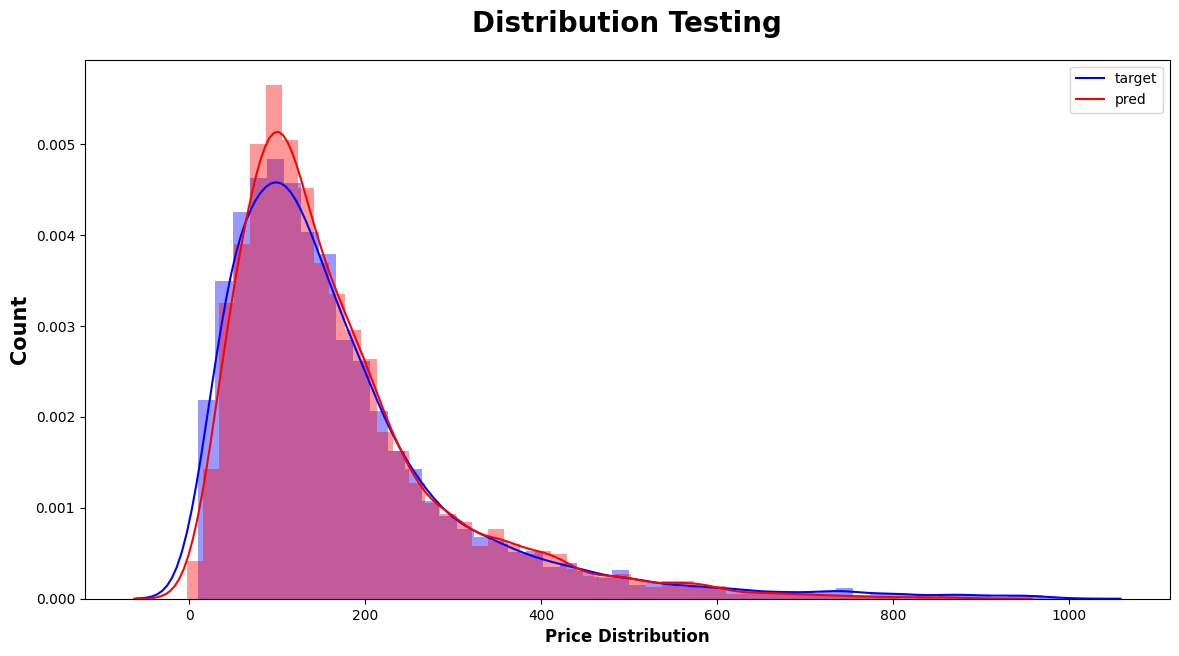

In [445]:
from sklearn.metrics import mean_squared_error

def rmse(y_pred_test, y_test):
    return mean_squared_error(y_test, y_pred_test, squared = False)

pred_df = pd.DataFrame()
pred_df['pred'] = y_pred_test
pred_df['target'] = list(y_test)

def plot_distribution():
    plt.subplots(figsize=(14,7))
    sns.distplot(x=pred_df['target'], color='blue', kde=True)
    sns.distplot(x=pred_df['pred'], color='red', kde=True)
    plt.title("Distribution Testing", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel(f'Price Distribution', weight="bold", fontsize=12)
    plt.legend(['target', 'pred'])
    plt.show()




print(rmse(y_pred_test, list(y_test)))

plot_distribution()

In [446]:
pred_df.head(30)

,pred,target
0,213.461016,323.529412
1,37.075781,34.939759
2,162.051765,126.315789
3,195.217161,250.000000
4,62.698644,55.681818
5,189.014564,198.333333
6,100.621994,95.000000
7,131.942609,110.579345
8,260.806351,239.285714
9,136.518826,96.764706


In [447]:
import matplotlib.pylab as plt

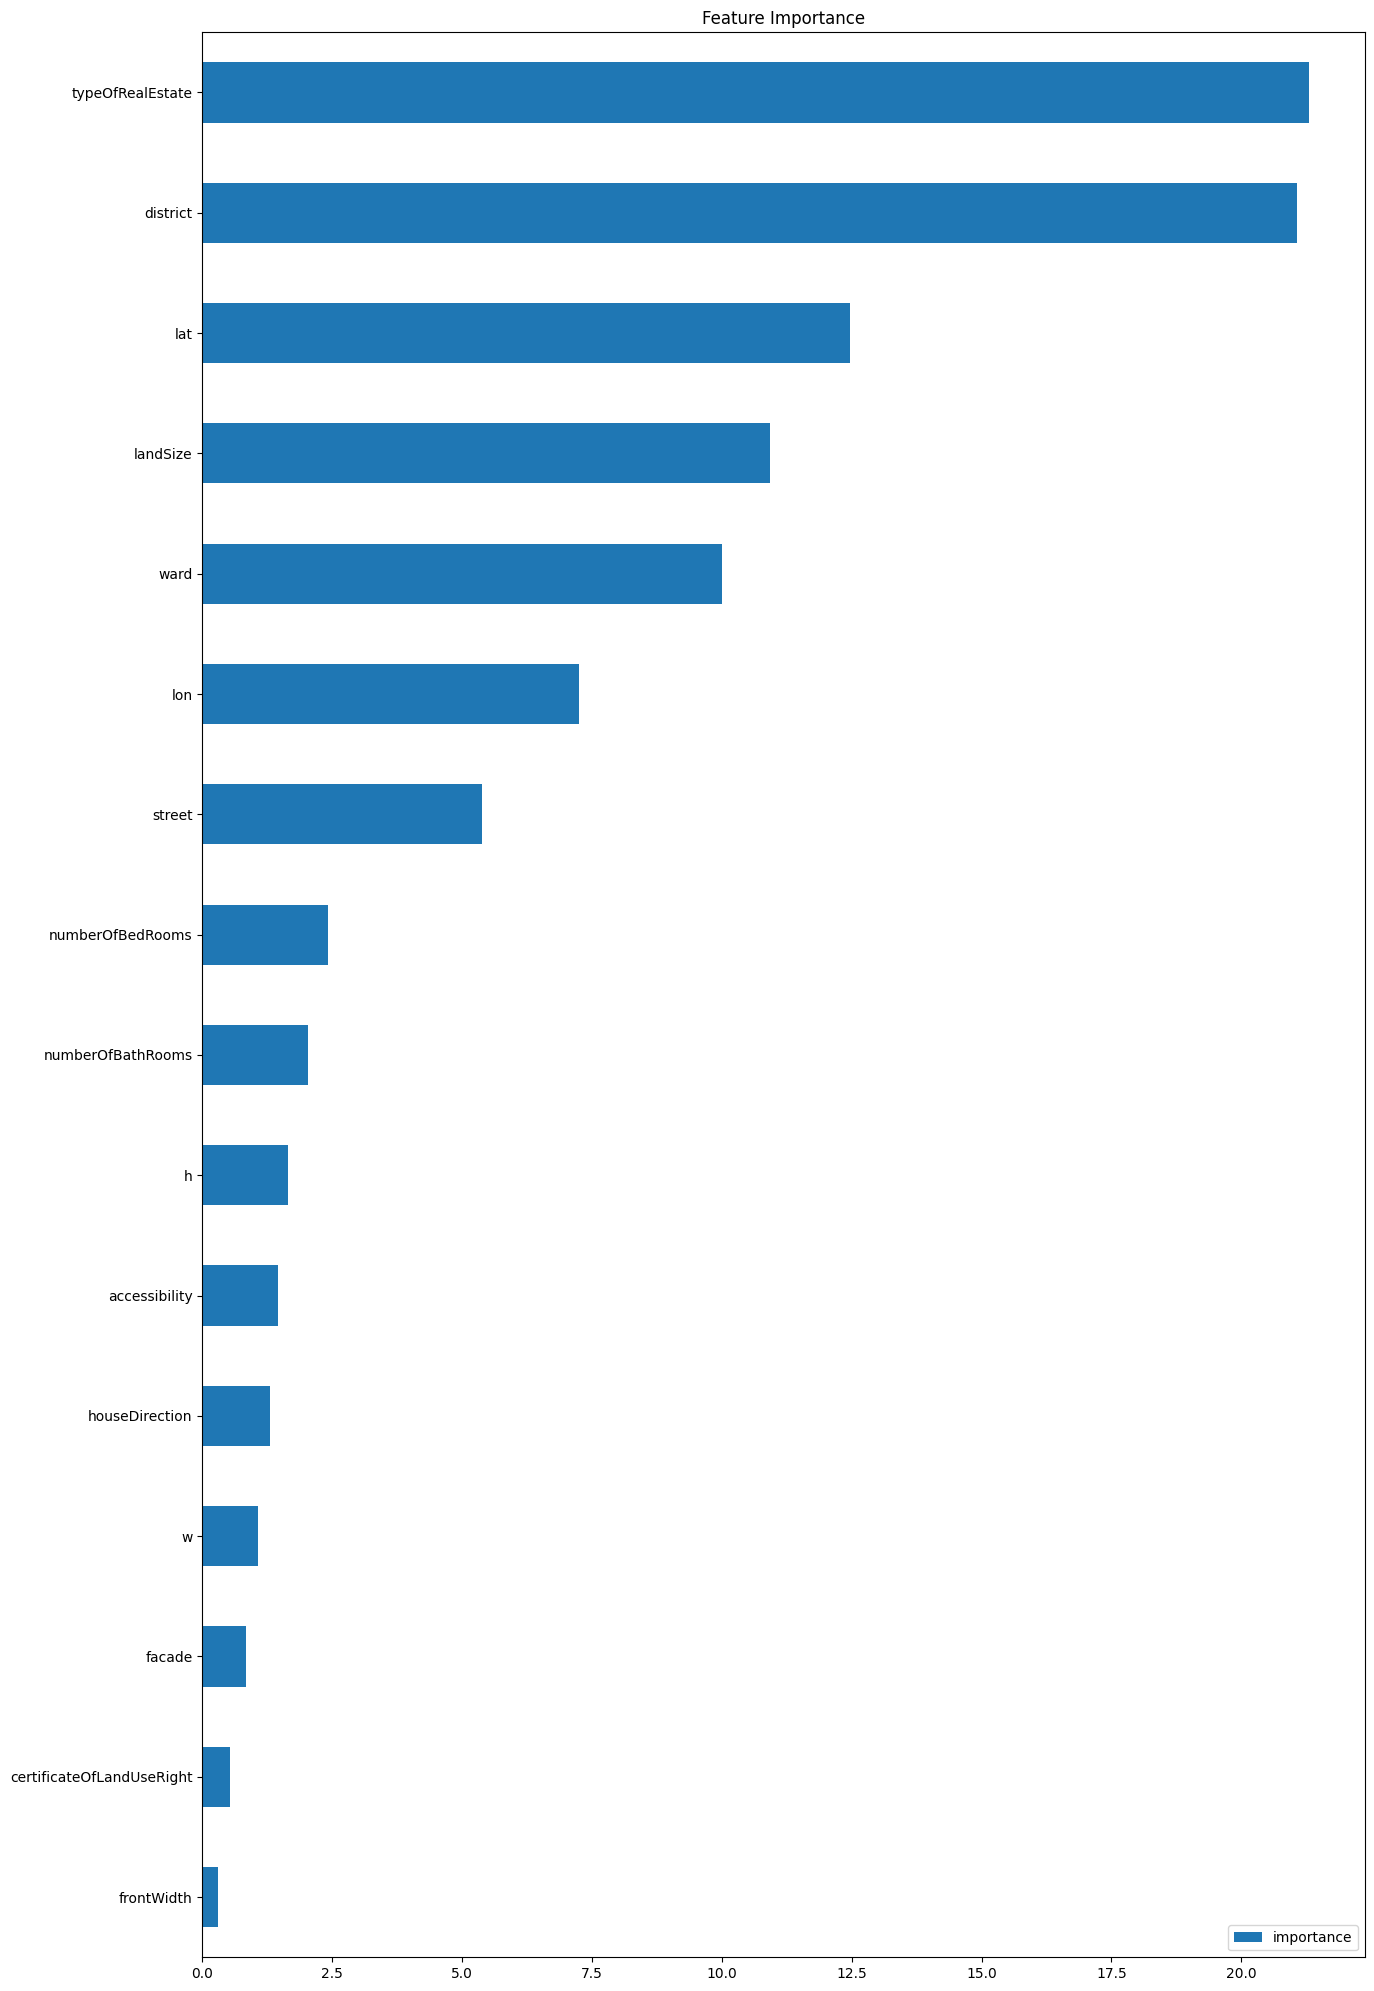

In [448]:
fi = pd.DataFrame(index=load_model.feature_names_)
fi['importance'] = load_model.feature_importances_
fi.loc[fi['importance'] > 0.1].sort_values('importance').plot(kind='barh', figsize=(15, 25), title='Feature Importance')
plt.show()


# fi = pd.DataFrame(index=all_cols)
# fi['importance'] = load_model.feature_importance()
# fi.loc[fi['importance'] > 0.1].sort_values('importance').plot(kind='barh', figsize=(15, 25), title='Feature Importance')
# plt.show()

In [449]:
fi.loc[fi['importance'] <= 0.1]

,importance


In [450]:
selected_cols = fi.index.tolist()

In [451]:
selected_cat_cols = [c for c in cat_cols if c in selected_cols]
selected_num_cols = [c for c in num_cols if c in selected_cols]
print(len(selected_cat_cols) + len(selected_num_cols))

16


In [452]:
selected_num_cols

['landSize',
 'facade',
 'w',
 'h',
 'numberOfBedRooms',
 'lon',
 'frontWidth',
 'lat',
 'numberOfBathRooms']

In [453]:
fi = fi.loc[fi['importance'] > 0.1].sort_values('importance')
fi.tail(25)

,importance
frontWidth,0.296463
certificateOfLandUseRight,0.526816
facade,0.836044
w,1.078227
houseDirection,1.310562
accessibility,1.449393
h,1.641368
numberOfBathRooms,2.030483
numberOfBedRooms,2.421722
street,5.381208


In [454]:
y_test

28631    323.529412
24950     34.939759
32494    126.315789
20889    250.000000
19437     55.681818
            ...    
2697      96.250000
22001    123.595506
21481     51.875000
10914    257.352941
7477     100.000000
Name: target, Length: 9209, dtype: float64

In [455]:
pred_df

,pred,target
0,213.461016,323.529412
1,37.075781,34.939759
2,162.051765,126.315789
3,195.217161,250.000000
4,62.698644,55.681818
...,...,...
9204,87.787314,96.250000
9205,167.804028,123.595506
9206,58.977471,51.875000
9207,220.434347,257.352941


In [456]:
import seaborn as sns
sns.distplot(x=df['num_of_restaurant_in_2000m_radius'], color='blue', kde=True)

KeyError: 'num_of_restaurant_in_2000m_radius'

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(df['num_of_restaurant_in_2000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_restaurant_in_2000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_restaurant_in_2000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])
ax[1].set_title('After GMM', fontsize=16)
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(df['num_of_restaurant_in_1000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_restaurant_in_1000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_restaurant_in_1000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])
ax[1].set_title('After GMM', fontsize=16)
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)

gmm.fit(df['num_of_bank_in_2000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_bank_in_2000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_bank_in_2000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 2]['target'], label='Component 2', ax=ax[1])

ax[1].set_title('After GMM', fontsize=16)
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(df['num_of_marketplace_in_2000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_marketplace_in_2000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_marketplace_in_2000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])

ax[1].set_title('After GMM', fontsize=16)
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(df['num_of_cafe_in_1000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_cafe_in_1000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_cafe_in_1000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])

ax[1].set_title('After GMM', fontsize=16)
plt.show()